<h2><center>ASSIGNMENT 2 -- GROUP 21</center></h2>
<h2><center>Name: DEEP JARIWALA, JUGAL KEDIA, JAITOON DHANANI</center></h2>
<h2><center>SID: 20909290, 20891429, 20875466</center></h2>
<h2><center>Problem 3</center></h2>

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### PREPARING THE CENTER POINTS FOR GAUSSIAN RBF FUNCTION

<p>The center points for gaussain kernel and dataset for training and testing is generated based on the criterion given in the question:</p> 
<p>x1 = -2 + 0.2i & x2 = -2 + 0.2j, such that i and j is (0,1,2,3......20).</p>

In [2]:
center_set = []
for i in range(0,21):
    x_i = round(-2 + 0.2*i,1)
    for j in range(0,21):
        x_j = round(-2 + 0.2*j,1)
        arr = [x_i, x_j]
        center_set.append(arr)
center_set = np.array(center_set)

### GENERATING LABELS BASED ON THE GIVEN FUNCTION

<p> Labels for the dataset is generated based on a given function. If the point (center/training data) lies in the unit circle it is labels as +1 and if outside the unit circle it is labeled as -1. The figure below shows the division of dataset labels:</p>

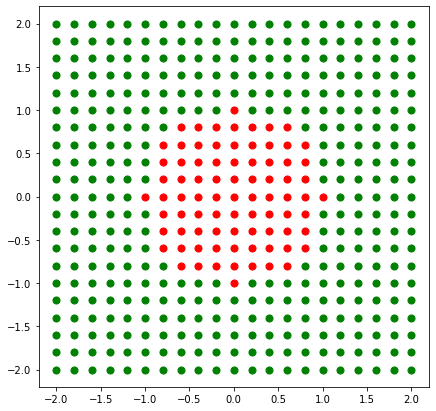

In [3]:
y = []
for i in range(0,441):
    if (center_set[i][0]**2 + center_set[i][1]**2 <= 1):
        y.append(1)
    else:
        y.append(-1)
        
plt.figure(figsize = (7,7))
for i in range(0,441):
    if y[i] == 1:
        plt.scatter(center_set[i][0], center_set[i][1], color = 'red', s = 50)
    else:
        plt.scatter(center_set[i][0], center_set[i][1], color = 'green', s = 50)
plt.show()

### CREATING DATAFRAME AND SPLITTING THE DATASET ( 80% TRAIN & 20% TEST )

<p>The dataset is splitted using train test split to 80 is to 20 ratio as training and test set respectively. The shape of the train test set is show in the cell below.</p>

In [4]:
df_train = pd.DataFrame(center_set, columns = ['x_i','x_j'])
df_label = pd.DataFrame(y, columns = ['labels'])
df = pd.concat([df_train,df_label], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df_train, df_label, test_size = 0.20, random_state = 7)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f" Training data: {X_train.shape}")
print(f" Testing data: {X_test.shape}")
print(f" Training labels: {y_train.shape}")
print(f" Testing labels: {y_train.shape}")

 Training data: (352, 2)
 Testing data: (89, 2)
 Training labels: (352, 1)
 Testing labels: (352, 1)


### DEFINING IMPORTANT FUNCTIONS FOR RADIAL BASIS FUNCTION NEURAL NETWORK FORMATION

<p>Important functions that will be used in the training of the Radial basis function neural network are:</p>
<ul>
    <li>Euclidean distance: This function calculates distance between the center of the gaussain RBF kernel and the training data.</li>
    <li>Gaussain kernel: It provides the mathematical formulation of the gaussian kernel that uses euclidean distance function defined above. It converts the training set which is not linearly seperable to linearly seperable.</li>
    <li>Gaussain Matrix: To optimize the RBF network, a gaussian matrix is defined of the shape (data point, center points) which after the psuedo inverse operation with labels optimize the network and provides the weight matrix for the network.</li>
    <li>Mean Squared Error: It is used to calculate the MSE error between the predicted labels and actual labels.</li> 
    <li>Accuracy Calculator: It is used to calculate the accuracy of the network on the basis of actual and predicted labels.</li>
</ul>

In [5]:
def euclidean_dist(p1,p2):
    e_dist = sum([(x - t) ** 2 for x,t in zip(p1,p2)])
    return e_dist

def gaussian_kernel(data, center, sigm):
    dist = euclidean_dist(data,center)
    res = dist/(2*((sigm)**2))
    gaus_res = math.exp(-1*res)
    return gaus_res

def gaussian_matrix(data, center, sigm):
    phi = np.zeros((len(data),len(center)))
    for i in range(len(data)):
        for k in range(len(center)):
            phi[i][k] = gaussian_kernel(data[i], center[k], sigm)
    return phi

def mean_squared_error(y_actual, y_pred):
    error = 0
    for i in range(len(y_actual)):
        error += ((y_actual[i] - y_pred[i])**2)
    final_error = error/len(y_actual)
    return final_error

def accuracy_calculator(actual, predicted):
    data_length = len(actual)
    for i in range(len(predicted)):
        if (predicted[i] > 0):
            predicted[i] = 1
        else:
            predicted[i] = -1
    counter = 0
    for j in range(len(actual)):
        if(actual[j] == predicted[j]):
            counter += 1
        else:
            counter += 0
    acc = counter/data_length
    return acc

### RBF NN OPTIMIZATION (CLOSED FORM SOLUTION FOR WEIGHTS) TO PREDICT FOR TEST AND TRAIN SET

<p>The following steps are followed to optimize and calculate weights of the RBFNN. After calculating weights prediction is conducted on the training and test set to check for accuracy and errors.</p>
<ul>
    <li>G_matrix is formed using the gaussain matrix function defined above that uses gaussain kernel and euclidean distance to calculate the G Matrix</li>
    <li>G_psuedo_inverse is calculated to optimize the problem and it is calculated using the pinv function in the linear algebra library of numpy.</li>
    <li>Once we get the weights we use G.W = Y equation to calculate predicted output for the training and test set.</li>
    <li>Based on the predication and actual outputs, accuracy and error is calculated using the function defined above.</li>
    <li>Based on the performance metrics a plot function is defined to create plot for accuracy and error measurements.</li>
</ul>

In [6]:
def RBFNN(data, center, sigm, test_set):
    error_train = []
    error_test = []
    train_acc = []
    test_acc = []
    
    for sig in sigm:    
        # FINDING WEIGHTS OF THE RBFNN
        G_matrix = gaussian_matrix(data, center, sig)
        G_psuedo_inverse = np.linalg.pinv(G_matrix)
        W = G_psuedo_inverse.dot(y_train)

        # PREDICTION ON TRAIN DATA
        y_predict_train = G_matrix.dot(W)

        # PREDICTION ON TEST DATA
        g_test_matrix = gaussian_matrix(test_set, center, sig)
        y_predict_test = g_test_matrix.dot(W)

        # Calculating error and accuracy
        error_train_value = mean_squared_error(y_train, y_predict_train)
        error_test_value = mean_squared_error(y_test, y_predict_test)

        train_acc_value = accuracy_calculator(y_train, y_predict_train)
        test_acc_value = accuracy_calculator(y_test, y_predict_test)
        
        error_train.append(error_train_value[0])
        error_test.append(error_test_value[0])
        train_acc.append(train_acc_value*100)
        test_acc.append(test_acc_value*100)
    
    return error_train, error_test, train_acc, test_acc

def plot_accuracy(sigma, train_ac, test_ac,  train_error, test_error):
    
    plt.figure(figsize = (15,5.5))
    
    plt.subplot(121)
    plt.plot(sigma, train_ac, 'g', label = "Train Accuracy", marker = ".")
    plt.plot(sigma, test_ac, 'b', label = "Test Accuracy", marker = ".")
    plt.title("Accuracy Chart")
    plt.xlabel("Spread Parameter (sigma)")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(sigma, train_error, 'g', label = "Train Error", marker = ".")
    plt.plot(sigma, test_error, 'r', label = "Test Error", marker = ".")
    plt.title("Error Chart")
    plt.xlabel("Spread Parameter (sigma)")
    plt.ylabel("Error")
    plt.legend()
    plt.grid()
    
    plt.show()

<p>Different approaches are used for RBFNN design. The spread parameter sigma is varied between 0 to 25 and center points are selected using three different approaches:</p>
<ul>
    <li>Approach1: All the center points are used (441 points). 2 input nodes ---> 441 hidden nodes ---> 1 output</li>
    <li>Approach2: Randomly selected 150 center points from 441 defined points. 2 input nodes ---> 150 hidden nodes ---> 1 output</li>
    <li>Approach3: K-Means clustering is used to select 150 centroids as the center point for RBF function. 2 input nodes ---> 150 hidden nodes ---> 1 output</li>
</ul>

# PART 1

### APPROACH 1: USING ALL VALUES AS CENTER AND TRAINING THE RBF NN

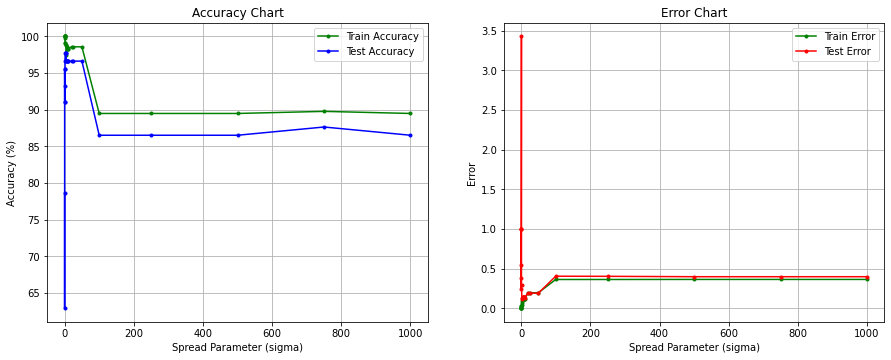

In [7]:
sigma_values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 50, 100, 250, 500, 750, 1000]

training_error, test_error, accuracy_training, accuracy_testing = RBFNN(X_train, center_set, sigma_values, X_test)
plot_accuracy(sigma_values, accuracy_training, accuracy_testing, training_error, test_error)

# PART 2

### APPROACH 2: RANDOMLY SELECTING 150 CENTERS AND TRAINING THE RBFNN

In [8]:
random_index = np.random.randint(len(center_set), size = 150)
new_centers = []
for i in range(len(random_index)):
    new_centers.append(center_set[random_index[i]])

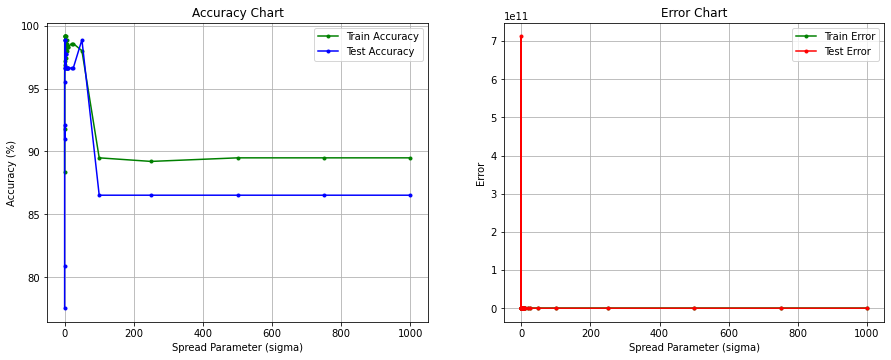

In [9]:
sigma_values_r = [0.001, 0.01, 0.05, 0.1, 0.2, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 50, 100, 250, 500, 750, 1000]

training_error_r, test_error_r, accuracy_training_r, accuracy_testing_r = RBFNN(X_train, new_centers, sigma_values, X_test)
plot_accuracy(sigma_values_r, accuracy_training_r, accuracy_testing_r, training_error_r, test_error_r)

### APPROACH 3: SELECTING CENTERS USING K-MEANS CLUSTERING ALGORITHM

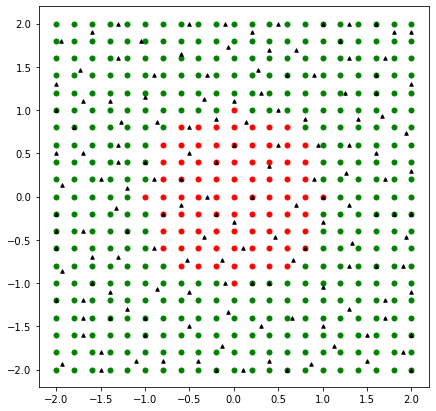

In [10]:
clusters = KMeans(n_clusters = 150, random_state = 256)
clusters.fit(X_train)
clustered_center = clusters.cluster_centers_

plt.figure(figsize = (7,7))
for i in range(0,441):
    if y[i] == 1:
        plt.scatter(center_set[i][0], center_set[i][1], color = 'red', s = 25)
    else:
        plt.scatter(center_set[i][0], center_set[i][1], color = 'green', s = 25)
for j in range(150):
    plt.scatter(clustered_center[j][0], clustered_center[j][1], color = 'black', marker = "^", s = 12)
plt.show()

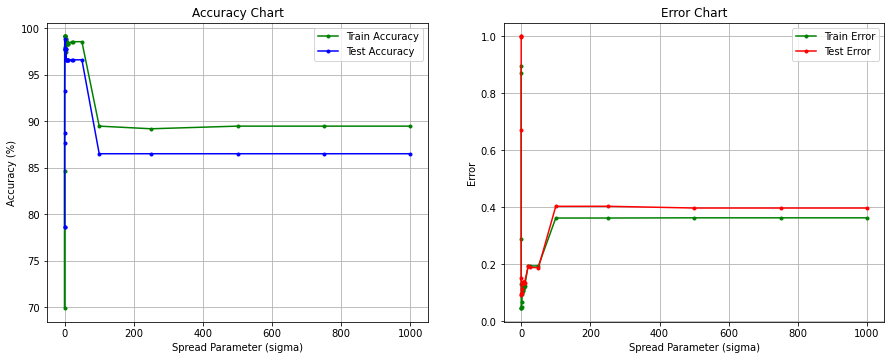

In [11]:
sigma_values_cl = [0.001, 0.01, 0.05, 0.1, 0.2, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 50, 100, 250, 500, 750, 1000]

training_error_cl, test_error_cl, accuracy_training_cl, accuracy_testing_cl = RBFNN(X_train, clustered_center, sigma_values_cl, X_test)
plot_accuracy(sigma_values_cl, accuracy_training_cl, accuracy_testing_cl, training_error_cl, test_error_cl)

### COMPARISON OF ALL THE APPROACHS

In [12]:
my_dict = {
    'sigma_values': sigma_values,
    'accuracy_training': accuracy_training,
    'accuracy_training_r': accuracy_training_r,
    'accuracy_training_cl': accuracy_training_cl,
    'accuracy_testing': accuracy_testing,
    'accuracy_testing_r': accuracy_testing_r,
    'accuracy_testing_cl': accuracy_testing_cl
}

my_dict_2 = {
    'sigma_values': sigma_values,
    'training_error': training_error,
    'training_error_r': training_error_r,
    'training_error_cl': training_error_cl,
    'test_error': test_error,
    'test_error_r': test_error_r,
    'test_error_cl': test_error_cl
}

accuracy_compare = pd.DataFrame(my_dict)
error_compare = pd.DataFrame(my_dict_2)

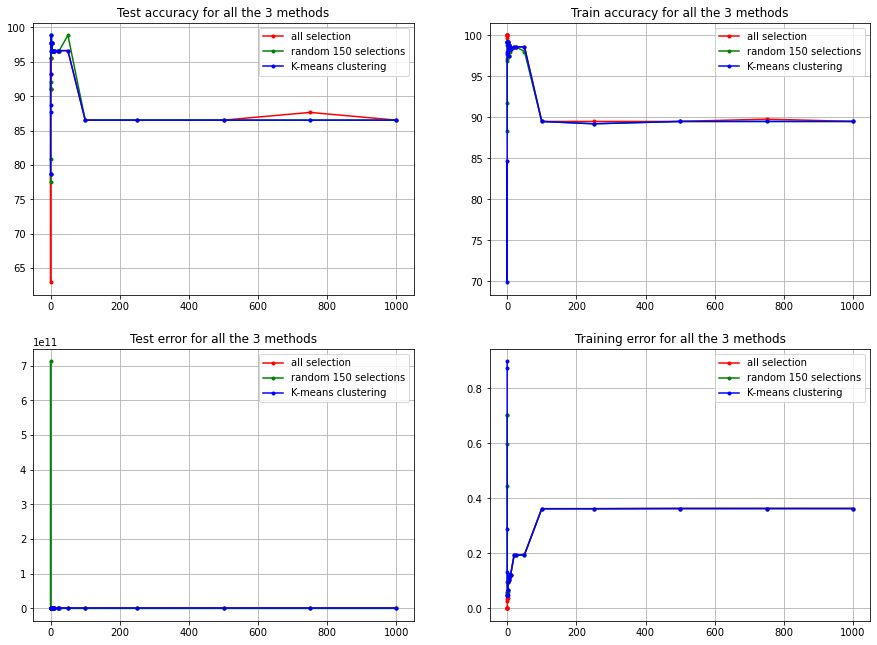

In [13]:
plt.figure(figsize = (15,11))
    
plt.subplot(221)
plt.plot(accuracy_compare['sigma_values'], accuracy_compare['accuracy_testing'], c = 'r', label = "all selection", marker = ".")
plt.plot(accuracy_compare['sigma_values'], accuracy_compare['accuracy_testing_r'], c = 'g', label = "random 150 selections", marker = ".")
plt.plot(accuracy_compare['sigma_values'], accuracy_compare['accuracy_testing_cl'], c = 'b', label = "K-means clustering", marker = ".")
plt.title("Test accuracy for all the 3 methods")
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(accuracy_compare['sigma_values'], accuracy_compare['accuracy_training'], c = 'r', label = "all selection", marker = ".")
plt.plot(accuracy_compare['sigma_values'], accuracy_compare['accuracy_training_r'], c = 'g', label = "random 150 selections", marker = ".")
plt.plot(accuracy_compare['sigma_values'], accuracy_compare['accuracy_training_cl'], c = 'b', label = "K-means clustering", marker = ".")
plt.title("Train accuracy for all the 3 methods")
plt.grid()
plt.legend()

plt.subplot(223)
plt.plot(error_compare['sigma_values'], error_compare['test_error'], c = 'r', label = "all selection", marker = ".")
plt.plot(error_compare['sigma_values'], error_compare['test_error_r'], c = 'g', label = "random 150 selections", marker = ".")
plt.plot(error_compare['sigma_values'], error_compare['test_error_cl'], c = 'b', label = "K-means clustering", marker = ".")
plt.title("Test error for all the 3 methods")
plt.grid()
plt.legend()

plt.subplot(224)
plt.plot(error_compare['sigma_values'], error_compare['training_error'], c = 'r', label = "all selection", marker = ".")
plt.plot(error_compare['sigma_values'], error_compare['training_error_r'], c = 'g', label = "random 150 selections", marker = ".")
plt.plot(error_compare['sigma_values'], error_compare['training_error_cl'], c = 'b', label = "K-means clustering", marker = ".")
plt.title("Training error for all the 3 methods")
plt.grid()
plt.legend()
plt.show()

<p>The above graphs show comparison of all the approaches of selecting the centers in the gaussain kernel (Hidden layer). The following important point were observed:<p>
<ul>
    <li>The best training accuracy is observed in case of the first approach as number of data points is equal to number of centers. The values of training accuracy reaches to a constant value at higher values of sigma for all the approaches. The decrease in accuracy is observed at higher values of sigma due to the fact that, at low value of sigma there will be no overlap between the gaussian kernel functions of different centers.</li>
    <li>The highest testing accuracy is observed at sigma = 2 and sigma = 3. It can be seen that at lower values of sigma (less than 1) the model overfits as the difference between training and test accuracy is high. For sigma greater than 1, It can be seen that the RBFNN is optimized with a good performance without over or under fitting the training data.</li>
    <li>Clustering and random selection show a better performance in training and testing compared to approach 1. This is due to the fact that number of hidden layers closer to number of features provides a better result, since 150 is less than 441. The highest testing accuracy is 98.88% at sigma = 2 using approach 2 and 3.</li>
    <li>In terms of computational complexity, approach 1 takes more time compared to other methods.</li>
    <li>To conclude it can be seen that the non-linearly seperable data can be now seperated using the RBFNN with 98.88% test accuracy. This networks shows a successfull linear transformation of the non-linearly seperable data using all the three methods.</li>
</ul>

<table>
  <tr>
    <th>Sigma</th>
    <th>Approach</th>
    <th>Training Accuracy</th>
    <th>Testing Accuracy</th>
  </tr>
  <tr>
    <td>2</td>
    <td>1</td>
    <td>99.15%</td>
    <td>97.75%</td>
   </tr>
  <tr>
    <td>2</td>
    <td>2</td>
    <td>99.15%</td>
    <td>98.88%</td>
   </tr>
  <tr>
    <td>2</td>
    <td>3</td>
    <td>99.15%</td>
    <td>98.88%</td>
   </tr>
    <tr>
    <td>3</td>
    <td>1</td>
    <td>98.86%</td>
    <td>97.75%</td>
   </tr>
  <tr>
    <td>3</td>
    <td>2</td>
    <td>99.15%</td>
    <td>97.75%</td>
   </tr>
  <tr>
    <td>3</td>
    <td>3</td>
    <td>98.86%</td>
    <td>97.75%</td>
   </tr>
</table>

### APPENDIX: ALL THE PERFORMANCE METRICS AT DIFFERENT VALUES OF SIGMA

In [14]:
accuracy_compare

,sigma_values,accuracy_training,accuracy_training_r,accuracy_training_cl,accuracy_testing,accuracy_testing_r,accuracy_testing_cl
0,0.001,100.000000,88.352273,84.659091,78.651685,77.528090,78.651685
1,0.010,100.000000,91.761364,69.886364,62.921348,80.898876,78.651685
2,0.050,100.000000,96.875000,98.011364,95.505618,92.134831,87.640449
3,0.100,100.000000,97.159091,97.727273,95.505618,91.011236,88.764045
4,0.200,100.000000,98.863636,99.147727,91.011236,95.505618,93.258427
5,0.800,99.715909,99.147727,99.147727,91.011236,98.876404,97.752809
6,0.900,100.000000,99.147727,99.147727,93.258427,96.629213,97.752809
7,1.000,99.147727,99.147727,99.147727,96.629213,96.629213,97.752809
8,2.000,99.147727,99.147727,99.147727,97.752809,98.876404,98.876404
9,3.000,98.863636,99.147727,98.863636,97.752809,97.752809,97.752809


In [15]:
error_compare

,sigma_values,training_error,training_error_r,training_error_cl,test_error,test_error_r,test_error_cl
0,0.001,0.000000e+00,0.704545,0.897727,1.000000,1.000000e+00,1.000000
1,0.010,9.066928e-31,0.704545,0.872159,1.000000,1.000000e+00,1.000000
2,0.050,4.030516e-30,0.596346,0.289180,0.996072,7.122596e+11,0.997886
3,0.100,3.664730e-30,0.444126,0.130719,0.238414,2.517817e+01,0.672665
4,0.200,4.070110e-29,0.095179,0.045745,0.543435,2.014760e-01,0.153102
5,0.800,2.559020e-02,0.056429,0.047527,3.428957,9.937856e-02,0.093329
6,0.900,3.380485e-02,0.058293,0.048204,0.378695,1.005168e-01,0.094784
7,1.000,3.695188e-02,0.059356,0.048919,0.295751,1.006734e-01,0.097591
8,2.000,6.691811e-02,0.067468,0.066982,0.116129,1.205959e-01,0.112829
9,3.000,9.655449e-02,0.097101,0.096849,0.129826,1.264993e-01,0.131532
